# Anime Character Generation with StyleGAN2

---

[Github](https://github.com/eugenesiow/practical-ml/) | More Notebooks @ [eugenesiow/practical-ml](https://github.com/eugenesiow/practical-ml)

---

Notebook to generate anime characters using a pre-trained StyleGAN2 model. 

We utilise the awesome lucidrains's [stylegan2-pytorch](https://github.com/lucidrains/stylegan2-pytorch) library with our [pre-trained model](https://huggingface.co/eugenesiow/ani-chara-gan) to generate 128x128 female anime characters.

The notebook is structured as follows:
* Setting up the Environment
* Using the Models (Running Inference)

# Setting up the Environment

#### Ensure we have a GPU runtime

If you're running this notebook in Google Colab, select `Runtime` > `Change Runtime Type` from the menubar. Ensure that `GPU` is selected as the `Hardware accelerator`. This will allow us to use the GPU to train the model subsequently.

The library requires that you have access to a `GPU`.



#### Setup Dependencies

We need to setup the `stylegan2_pytorch` library so lets install it.

In [14]:
!pip install -q stylegan2_pytorch==1.5.10

     |████████████████████████████████| 15.7 MB 62 kB/s 
     |████████████████████████████████| 23.3 MB 47.3 MB/s 
     |████████████████████████████████| 3.1 MB 42.0 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.3 MB/s eta 0:00:36tcmalloc: large alloc 1147494400 bytes == 0x5567c5ef0000 @  0x7fd430769615 0x5567c28f94cc 0x5567c29d947a 0x5567c28fc2ed 0x5567c29ede1d 0x5567c296fe99 0x5567c296a9ee 0x5567c28fdbda 0x5567c296fd00 0x5567c296a9ee 0x5567c28fdbda 0x5567c296c737 0x5567c29eec66 0x5567c296bdaf 0x5567c29eec66 0x5567c296bdaf 0x5567c29eec66 0x5567c296bdaf 0x5567c28fe039 0x5567c2941409 0x5567c28fcc52 0x5567c296fc25 0x5567c296a9ee 0x5567c28fdbda 0x5567c296c737 0x5567c296a9ee 0x5567c28fdbda 0x5567c296b915 0x5567c28fdafa 0x5567c296bc0d 0x5567c296a9ee
     |████████████████████████████████| 881.9 MB 19 kB/s 
     |████████████████████████████████| 76 kB 4.0 MB/s 
     |████████████████████████████████| 97 kB 6.2 MB/s 
     |████████████████████████████████| 1.1 MB 38.9 MB/s 
    

# Using the Model (Running Inference)

First we download the checkpoint weights from the pre-trained model which is stored on the superb huggingface model hub.

We make use of the `torch.hub.download_url_to_file` function to download the model weights stored in a `.pt` file to a folder stucture we have created.

In [30]:
import torch
from pathlib import Path

Path('/content/models/ani-chara-gan/').mkdir(parents=True, exist_ok=True)
torch.hub.download_url_to_file('https://huggingface.co/eugenesiow/ani-chara-gan/resolve/main/model.pt',
                               '/content/models/ani-chara-gan/model_150.pt')
torch.hub.download_url_to_file('https://huggingface.co/eugenesiow/ani-chara-gan/resolve/main/.config.json',
                               '/content/models/ani-chara-gan/.config.json')

  0%|          | 0.00/156 [00:00<?, ?B/s]

Next we run inference to generate our image from the Anime Character GAN.

Specifically we are running the following steps:

* Load the model using lucidrain's library and the `ModelLoader` convenience function. The model is loaded from the directory we have downloaded the pre-trained model to `/content/models/ani-chara-gan/`.
* Randomly initialise with some `noise`.
* Use the convenience function `noise_to_styles`. This basically passes the noise vector through the network to get the style vector. At the backend, this calls `model.GAN.SE(noise)`.
* Use the convenience function `styles_to_images` to call the generator on the style vector. At the backend, this roughly calls `model.GAN.GE(styles)`.
* Save the output vector to an image with `save_image`.
* Display the saved image with `cv2_imshow`.

continuing from previous epoch - 150
loading from version 1.5.10


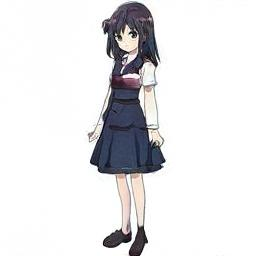

In [36]:
import torch
import cv2
from google.colab.patches import cv2_imshow
from torchvision.utils import save_image
from stylegan2_pytorch import ModelLoader

loader = ModelLoader(
    base_dir = '/content/', name = 'ani-chara-gan'
)

noise   = torch.randn(1, 256).cuda() # noise
styles  = loader.noise_to_styles(noise, trunc_psi = 0.7)  # pass through mapping network
images  = loader.styles_to_images(styles) # call the generator on intermediate style vectors

save_image(images, './sample.jpg')
cv2_imshow(cv2.imread('./sample.jpg'))

We can connect to Google Drive with the following code. You can also click the `Files` icon on the left panel and click `Mount Drive` to mount your Google Drive.

The root of your Google Drive will be mounted to `/content/drive/My Drive/`. If you have problems mounting the drive, you can check out this [tutorial](https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

You can move the output files which are saved in the `/content/` directory to the root of your Google Drive.

In [ ]:
import shutil
shutil.move('/content/sample.jpg', '/content/drive/My Drive/sample.jpg')

More Notebooks @ [eugenesiow/practical-ml](https://github.com/eugenesiow/practical-ml) and do star or drop us some feedback on how to improve the notebooks on the [Github repo](https://github.com/eugenesiow/practical-ml/).